<a href="https://colab.research.google.com/github/AkeemLawrence/Data-602/blob/main/NYC_Tree_Census_Activity_Analyze_a_Dataset_of_NYC_311_Service_Requests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment**:  NYC Tree Census - Exploratory Data Analysis

**Overview**

In this one-hour live meetup, you’ll work in small groups (2-3 students) to explore and analyze a dataset of NYC 311 Service Requests from NYC Open Data. The 311 system is a public service where New Yorkers report non-emergency issues like noise complaints, potholes, or rodent sightings. Your task is to analyze the dataset, uncover interesting patterns or insights, and prepare a brief presentation (2-3 minutes) of your findings for the class.

**Time Limit:** 60 minutes total (40 minutes for analysis, 10 minutes to prepare presentation, 10 minutes for sharing).

**Dataset:** "2015 Street Tree Census - Tree Data" (available from NYC Open Data: https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh).


**Tools:** Python with pandas, matplotlib, and/or seaborn (pre-installed in your environment).

**Deliverable:** A short presentation (2-3 minutes) summarizing your findings with at least one visualization.

**Dataset Description**
The dataset contains over 600,000 trees, but our subset (nyc_trees_2015.csv) is trimmed to 50,000 rows for simplicity.

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data from NYC Open Data API (50,000 rows, all boroughs)
url = "https://data.cityofnewyork.us/resource/uvpi-gqnh.json?$limit=50000"
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'tree_dbh' to numeric (API returns strings)
df['tree_dbh'] = pd.to_numeric(df['tree_dbh'], errors='coerce')

# Inspect columns and first few rows
print("Available columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nBoroughs represented:", df['boroname'].unique())

Available columns: ['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'address', 'zipcode', 'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council_district', 'census_tract', 'bin', 'bbl']

First 5 rows:
  tree_id block_id               created_at  tree_dbh stump_diam curb_loc  \
0  180683   348711  2015-08-27T00:00:00.000         3          0   OnCurb   
1  200540   315986  2015-09-03T00:00:00.000        21          0   OnCurb   
2  204026   218365  2015-09-05T00:00:00.000         3          0   OnCurb   
3  204337   217969  2015-09-05T00:00:00.000        10          0   OnCurb   
4  189565   223043  2015-08-30T00:00:00.

In [ ]:
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council_district,census_tract,bin,bbl
0,180683,348711,2015-08-27T00:00:00.000,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.72309177,-73.84421522,1027431.148,202756.7687,29,739,4052307,4022210001
1,200540,315986,2015-09-03T00:00:00.000,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.79411067,-73.81867946,1034455.701,228644.8374,19,973,4101931,4044750045
2,204026,218365,2015-09-05T00:00:00.000,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.71758074,-73.9366077,1001822.831,200716.8913,34,449,3338310,3028870001
3,204337,217969,2015-09-05T00:00:00.000,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.71353749,-73.93445616,1002420.358,199244.2531,34,449,3338342,3029250001
4,189565,223043,2015-08-30T00:00:00.000,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.66677776,-73.97597938,990913.775,182202.426,39,165,3025654,3010850052


**What are the most common tree species in NYC?**

Explore the frequency of spc_common and identify dominant species.

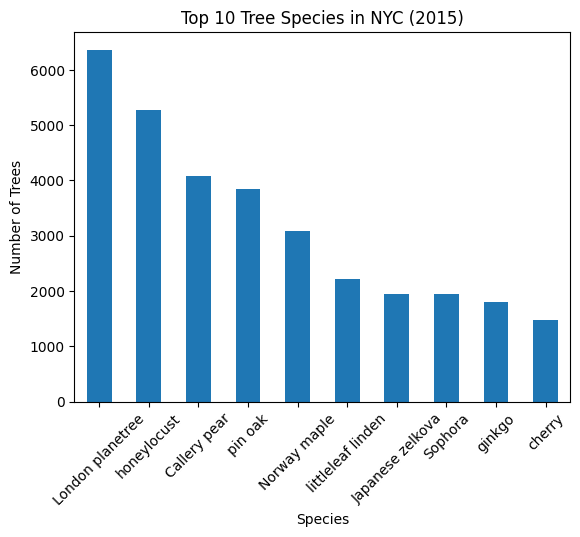

In [ ]:
top_species = df['spc_common'].value_counts().head(10)
top_species.plot(kind='bar', title='Top 10 Tree Species in NYC (2015)')
import matplotlib.pyplot as plt
plt.xlabel('Species')
plt.ylabel('Number of Trees')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Does the top species vary by borough?
print("Top species by borough:")
print(df.groupby('boroname')['spc_common'].value_counts().groupby(level=0).head(1))

Top species by borough:
boroname       spc_common      
Bronx          honeylocust          804
Brooklyn       London planetree    2414
Manhattan      honeylocust         1480
Queens         London planetree    2299
Staten Island  Callery pear        1087
Name: count, dtype: int64


Trees by Borough


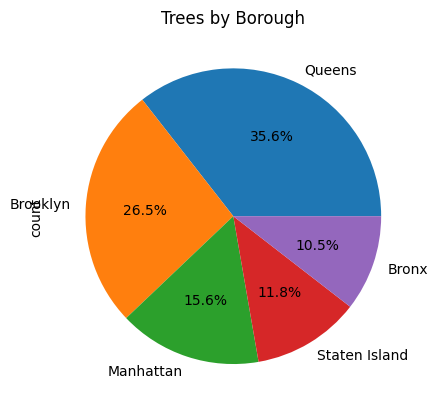

In [ ]:
# 2. Which borough has the most trees?
print("Trees by Borough")
borough_counts = df['boroname'].value_counts()
borough_counts.plot(kind='pie', title='Trees by Borough', autopct='%1.1f%%')
plt.show()

In [ ]:
#Are bigger trees (higher 'tree_dbh') more common in certain boroughs?
print("\nAverage tree diameter by borough:")
print(df.groupby('boroname')['tree_dbh'].mean())


Average tree diameter by borough:
boroname
Bronx            10.781357
Brooklyn         11.753352
Manhattan         8.704874
Queens           12.476458
Staten Island    10.756881
Name: tree_dbh, dtype: float64


# **For this assignment, with your group - try to answer 1-2 guiding questions.  If you have more time, feel free to answer as many as you can.**

You are also free to create your own questions!  Explore the dataset and have FUN!

**Remember - this is just a fun activity to practice our skills in a small group - don't stress if you can't finish in time!**


---


# Example Guided Open-Ended Questions

* What are the most common tree species in NYC?

  *  Example: Bar chart of top 10 species.

  * Follow-Up: Does the top species vary by borough? (top species per borough.)

* Which borough has the most trees?

  * Example: Pie chart of trees by borough.

  * Follow-Up: Are bigger trees (higher tree_dbh) more common in certain boroughs? (average diameter.)

* How healthy are NYC’s trees?

  * Example: Bar chart of health statuses.

  * Follow-Up: Do certain species (e.g., "London planetree") have poorer health?

* What’s the relationship between tree size and health?

  * Example: Boxplot of tree_dbh by health.

  * Follow-Up: Are there massive outliers? (max diameter.)

* Open-Ended Exploration: What else stands out?

  * Example: Bar chart of average tree size by species.

* More Ideas:

  * Rare species: df['spc_common'].value_counts().tail(5).

  * Largest trees by borough: df.groupby('boroname')['tree_dbh'].max().






Available columns: ['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'address', 'zipcode', 'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council_district', 'census_tract', 'bin', 'bbl']

First 5 rows:
  tree_id block_id               created_at  tree_dbh stump_diam curb_loc  \
0  180683   348711  2015-08-27T00:00:00.000         3          0   OnCurb   
1  200540   315986  2015-09-03T00:00:00.000        21          0   OnCurb   
2  204026   218365  2015-09-05T00:00:00.000         3          0   OnCurb   
3  204337   217969  2015-09-05T00:00:00.000        10          0   OnCurb   
4  189565   223043  2015-08-30T00:00:00.

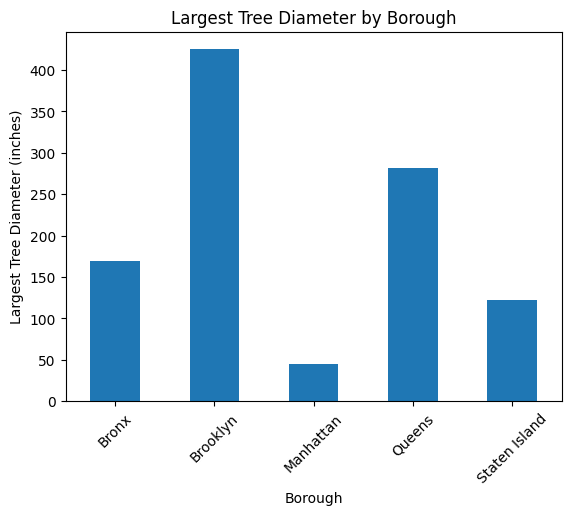

boroname
Bronx                 honeylocust
Brooklyn          swamp white oak
Manhattan            American elm
Queens           London planetree
Staten Island             pin oak
Name: spc_common, dtype: object
spc_common
European alder        27.000000
London planetree      21.023259
silver maple          20.274002
weeping willow        19.083333
pignut hickory        17.538462
                        ...    
tartar maple           3.454545
Chinese tree lilac     3.130435
eastern hemlock        3.117647
pond cypress           2.500000
Scots pine             2.000000
Name: tree_dbh, Length: 124, dtype: float64


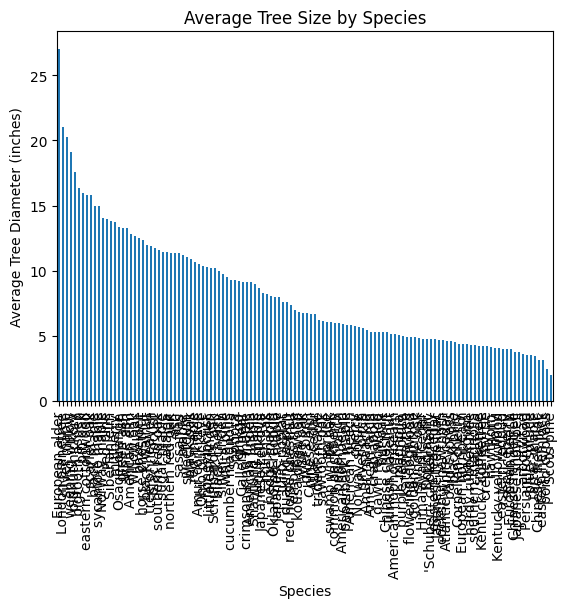

spc_common
European alder        27.000000
London planetree      21.023259
silver maple          20.274002
weeping willow        19.083333
pignut hickory        17.538462
                        ...    
tartar maple           3.454545
Chinese tree lilac     3.130435
eastern hemlock        3.117647
pond cypress           2.500000
Scots pine             2.000000
Name: tree_dbh, Length: 124, dtype: float64


In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data from NYC Open Data API (50,000 rows, all boroughs)
url = "https://data.cityofnewyork.us/resource/uvpi-gqnh.json?$limit=50000"
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'tree_dbh' to numeric (API returns strings)
df['tree_dbh'] = pd.to_numeric(df['tree_dbh'], errors='coerce')

# Inspect columns and first few rows
print("Available columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nBoroughs represented:", df['boroname'].unique())


# Calculate the largest tree diameter by borough
largest_trees_by_borough = df.groupby('boroname')['tree_dbh'].max()

# Display the result
print(largest_trees_by_borough)

# Create a bar chart of the largest tree diameter by borough
largest_trees_by_borough.plot(kind='bar', title='Largest Tree Diameter by Borough')
plt.xlabel('Borough')
plt.ylabel('Largest Tree Diameter (inches)')
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data from NYC Open Data API (50,000 rows, all boroughs)
url = "https://data.cityofnewyork.us/resource/uvpi-gqnh.json?$limit=50000"
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'tree_dbh' to numeric (API returns strings)
df['tree_dbh'] = pd.to_numeric(df['tree_dbh'], errors='coerce')

# Inspect columns and first few rows
print("Available columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nBoroughs represented:", df['boroname'].unique())


# Calculate the largest tree diameter by borough
largest_trees_by_borough = df.groupby('boroname')['tree_dbh'].max()

# Display the result
print(largest_trees_by_borough)

# Create a bar chart of the largest tree diameter by borough
largest_trees_by_borough.plot(kind='bar', title='Largest Tree Diameter by Borough')
plt.xlabel('Borough')
plt.ylabel('Largest Tree Diameter (inches)')
plt.xticks(rotation=45)
plt.show() #Added to show the plot

#Plot the species of each largest tree
#Instead of using max(), which leads to TypeError, use a method to select the species
#corresponding to the largest tree diameter in each borough.

#First, sort the dataframe by tree diameter in descending order
df_sorted = df.sort_values('tree_dbh', ascending=False)

#Then, group by borough and take the first entry for 'spc_common',
#which will correspond to the species of the largest tree
largest_trees_by_borough_species = df_sorted.groupby('boroname')['spc_common'].first()

# Display the result
print(largest_trees_by_borough_species)

# Bar chart of average tree size by species.
average_tree_size_by_species = df.groupby('spc_common')['tree_dbh'].mean().sort_values(ascending=False)

# Display the result
print(average_tree_size_by_species)

average_tree_size_by_species.plot(kind='bar', title='Average Tree Size by Species')
plt.xlabel('Species')
plt.ylabel('Average Tree Diameter (inches)')
plt.xticks(rotation=90)
plt.show() #Added to show the plot

# Display the result
print(average_tree_size_by_species)

